# Epymorph dev log: May 31, 2023

Author: Alexander Nez

as of git hash:

### Social Determinate of Health (sdh)

### sdh toml params
theta = 0.1 

beta = 0.25

move_control = 0.9

infection_duration = 4.0

immunity_duration = 90.0

infection_seed_loc = 0

infection_seed_size = 10000

hospitalization_duration = 4.0

hospitalization_rate = [-2.4, 2.1, 1.1]

alpha = [0.1, 0.63, 0.23]

linear = [0.02, 0]

SDH = [5.23, -3.83, 1.72]



# sdh with pei movement

The noise in compartment 4 (hospitalized) is mostly due to ploting in tau steps instead of tau sum.
It may be a result that in 2/3 tau there is more activity happening than conpared to 1/3 tau
### plots sdh model by prevalence
python -m epymorph run --ipm sdh --mm pei --geo pei --params "./scratch/sdh_params.toml" --start_date "2015-01-01" --duration "150d" --chart "p0"
### creats sirh_sdh
python -m epymorph run --ipm sdh --geo pei --mm pei --start_date 2015-01-01 --duration 150d --params ./scratch/sdh_params.toml --out ./scratch/sirh_sdh_pei.csv

In [87]:
import os

from epymorph.run import run

dir = os.path.expanduser('~/Desktop/Github/Epymorph/scratch')

exit_code = run(
    ipm_name = 'sirh',
    mm_name = 'pei',
    geo_name = 'pei',
    start_date_str = '2015-01-01',
    duration_str = '150d',
    params_path = f"{dir}/sdh_params.toml",
    out_path = './scratch/sirh_pei.csv',
    chart = 'p0',
    profiling=False
)

Loading requirements:
[✓] IPM (sirh)
[✓] MM (pei)
[✓] Geo (pei)
[✓] Parameters (file:/Users/alexandernez/Desktop/Github/Epymorph/scratch/sdh_params.toml)

Running simulation:
• 2015-01-01 to 2015-05-31 (150 days)
• 6 geo nodes


ValueError: p < 0, p > 1 or p contains NaNs

### plotting result

/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_1061/2892421817.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  State['I & H->R'] = State['I->R'] + State['H->R']


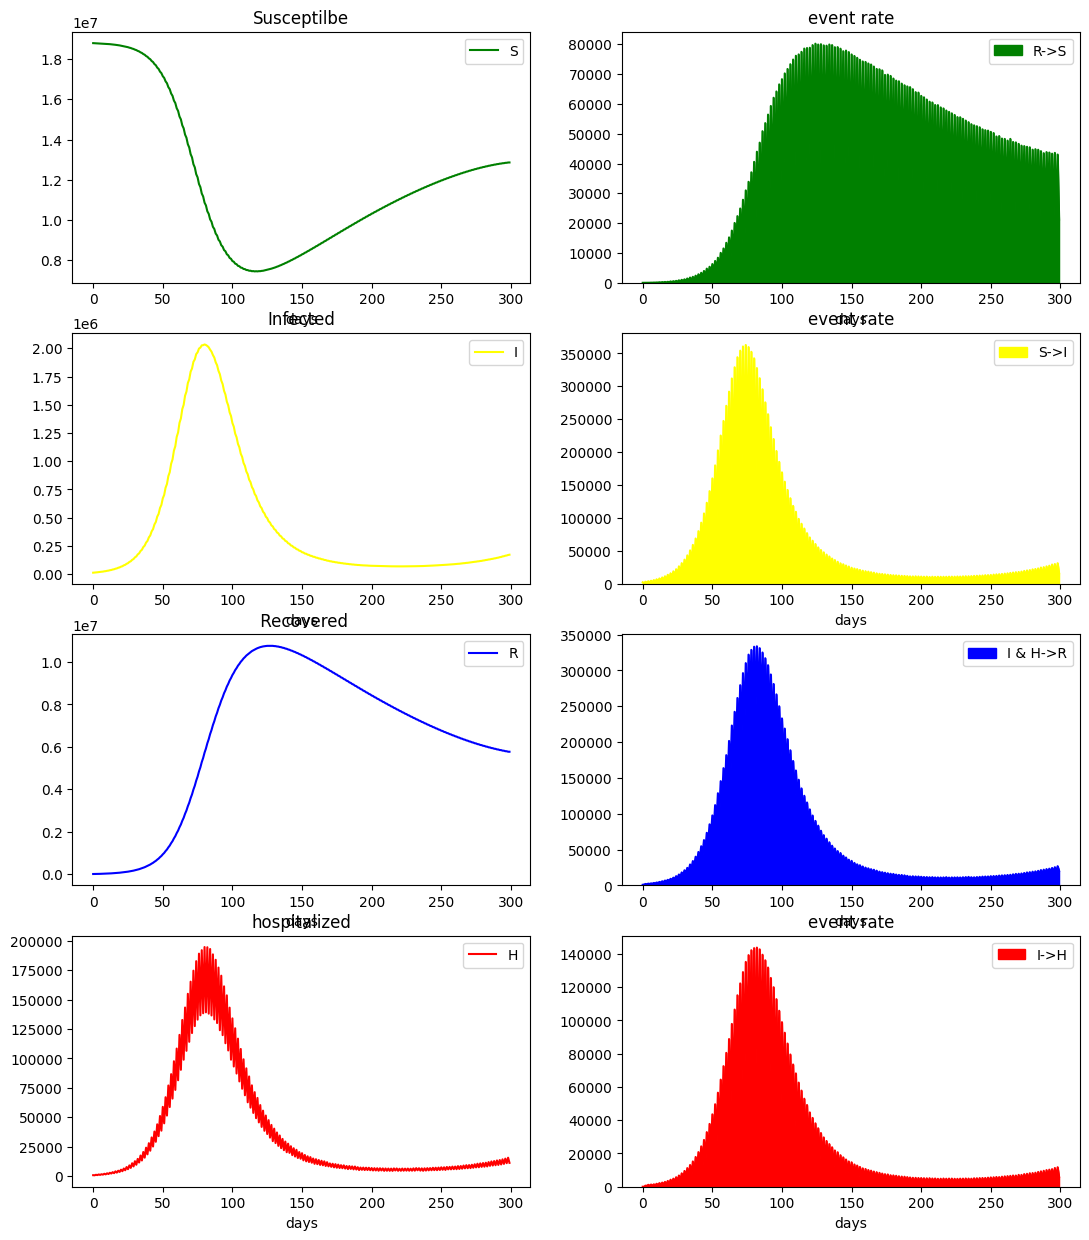

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

dir = os.path.expanduser('~/Desktop/Github/Epymorph/scratch')
header_names = ['days', 'State', 'S', 'I', 'R', 'H', 'S->I', 'I->R', 'I->H','H->R', 'R->S']
df = pd.read_csv(dir + '/sirh_pei.csv', header= None, skiprows = 1, names = header_names)

State = df.loc[df['State'] == 0]
State['I & H->R'] = State['I->R'] + State['H->R']
State.to_csv('~/Desktop/Github/Epymorph/scratch/sirh_State.csv')

# plotting results
# Get current axis
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(13,15))
 
# plot for susceptible
State.plot(kind='line',
        x='days',
        y='S',
        color='green', 
        ax=axes[0,0],
        title = 'Susceptilbe')
State.plot(kind='area', 
        x='days',
        y='R->S',
        color='green', 
        ax=axes[0,1],
        title = 'event rate')

#plot for infected
State.plot(kind='line', 
        x='days',
        y='I',
        color='yellow', 
        ax=axes[1,0],
        title = 'Infected')
State.plot(kind='area',
        x='days',
        y='S->I',
        color='yellow', 
        ax=axes[1,1],
        title = 'event rate')

#plot for recovered
State.plot(kind='line', 
        x='days',
        y='R',
        color='blue',
        ax=axes[2,0],
        title = ' Recovered')
State.plot(kind='area', 
        x='days',
        y='I & H->R',
        color='blue', 
        ax=axes[2,1],)


#plot for hospitalized
State.plot(kind='line', 
        x='days',
        y='H',
        color='red', 
        ax=axes[3,0],
        title = 'hospitalized')
State.plot(kind='area', 
        x='days',
        y='I->H',
        color='red', 
        ax=axes[3,1],
        title = 'event rate')
 
# show the plot
plt.show()